### IDs:
Insert yours IDs to the cell below

ID

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, kendalltau, spearmanr, randint, norm, expon, binom
import scipy.stats as sp
import warnings
import itertools
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
warnings.filterwarnings('ignore')

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

**Answer** - Here we have $\rho(x_{n-1},y_{n-1})>-0.2$:

In [3]:
X = np.arange(1,50)
Y = -(X % 10)
rho_1 = pearsonr(X,Y)[0]
rho_1

-0.1530931089239486

And by adding the last element for each of the vectors, we get $\rho(x,y)<-0.9$ as required.

In [4]:
X = np.append(X, -1000)
Y = np.append(Y, 111)
rho_2 = pearsonr(X,Y)[0]
rho_2

-0.9832431221073454

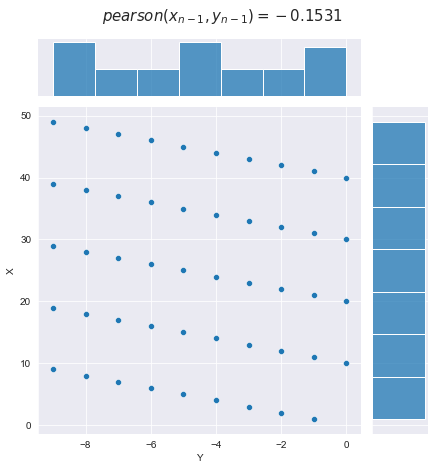

In [5]:
g = sns.jointplot(y=X[:-1],x=Y[:-1])
plt.suptitle(r'$pearson(x_{n-1},y_{n-1})='f'{rho_1:.4f}$', y=1.05, size=15)
g.set_axis_labels('Y', 'X');

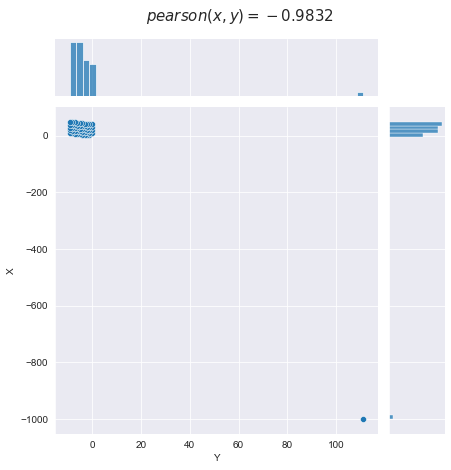

In [6]:
g = sns.jointplot(y=X,x=Y)
plt.suptitle(r'$pearson(x,y)='f'{rho_2:.4f}$', y=1.05, size=15);
g.set_axis_labels('Y', 'X');

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

**Answer** - Using the following algorithm, we managed to find two lists which satisfy this condition. Beware that this algorithm won't stop until he finds a match, this is why we chose to hash it out by default.

In [7]:
def find_corrs(n=51):
    corr = 0
    while abs(corr) < 0.45:
        X = np.random.randint(1, n, 50)
        Y = X.copy()
        Y1 = Y.copy()
        corr = spearmanr(X,Y)[0] - kendalltau(X,Y)[0]
        corr_new = corr
        while True:
            for i in X:
                for j in range(len(Y)):
                    Y1 = Y.copy()
                    Y1[j] = i
                    if spearmanr(X,Y1)[0] - kendalltau(X,Y1)[0] < corr:
                        corr = spearmanr(X,Y1)[0] - kendalltau(X,Y1)[0]
                        Y[j] = i
            print(f'corrent corr diff: {corr:.4f}')
            if abs(corr_new-corr) < 0.005:
                break
            corr_new = corr
        
    return X, Y

In [8]:
# X, Y = find_corrs(500)

In [9]:
# X

In [10]:
# Y

In [11]:
X = np.array([654, 449, 443, 280, 574, 560, 986, 320, 292, 936, 641, 555, 966,
       771, 887,  58, 513, 575, 119, 863, 773, 916, 937, 949, 236, 720,
       560, 550, 976, 768, 937, 781, 830, 793, 444, 411, 950, 267, 470,
        20, 479, 583, 832, 569, 641, 735,  56, 932, 506, 785])

Y = np.array([ 56, 470, 449, 444, 574, 560, 292, 449, 444, 280,  20, 555, 292,
        58, 267, 411, 513, 575, 411, 267, 119, 267, 280, 292, 443,  56,
       560, 550, 292,  58, 280, 119, 236, 236, 470, 449, 292, 443, 479,
       320, 479, 583, 236, 569,  20,  58, 320, 280, 506, 119])
diff = kendalltau(X,Y)[0] - spearmanr(X,Y)[0]

In [12]:
print(f'kendall:  {kendalltau(X,Y)[0]:.4f}')
print(f'spearman:  {spearmanr(X,Y)[0]:.4f}')
print(f'diff:  {diff:.4f}')

kendall:  -0.0540
spearman:  -0.5042
diff:  0.4502


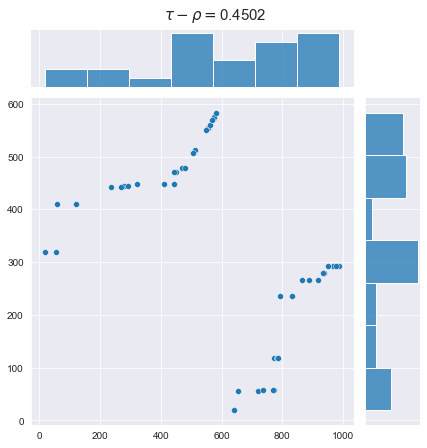

In [13]:
sns.jointplot(x=X, y=Y)
g.set_axis_labels('X', 'Y')
plt.suptitle(rf'$\tau-\rho=${diff:.4f}', y=1.03, size=15);

Thanks to the algorithm, we got the intuition for maximizing the difference just by looking at the plot. Consider the following simpler example:

In [14]:
X = np.arange(10, 61)
Y = X.copy()
Y[:len(Y)//2] **=2
diff = kendalltau(X,Y)[0] - spearmanr(X,Y)[0]
print(f'kendall:  {kendalltau(X,Y)[0]:.4f}')
print(f'spearman:  {spearmanr(X,Y)[0]:.4f}')
print(f'diff:  {diff:.4f}')

kendall:  -0.0196
spearman:  -0.5000
diff:  0.4804


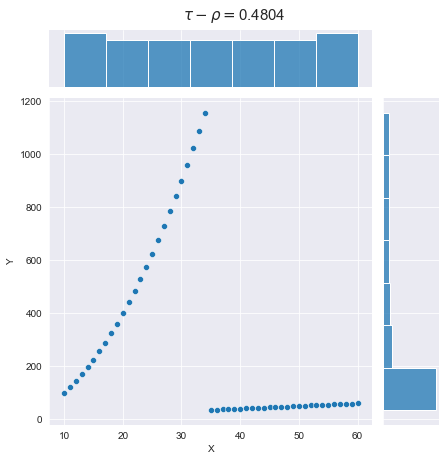

In [15]:
g = sns.jointplot(x=X, y=Y);
g.set_axis_labels('X', 'Y')
plt.suptitle(rf'$\tau-\rho=${diff:.4f}', y=1.03, size=15);

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

**Answer** - just take $Y'=-Y$ from the previous item.

In [16]:
Y = -Y
diff = kendalltau(X,Y)[0] - spearmanr(X,Y)[0]
print(f'kendall:  {kendalltau(X,Y)[0]:.4f}')
print(f'spearman:  {spearmanr(X,Y)[0]:.4f}')
print(f'diff:  {kendalltau(X,Y)[0] - spearmanr(X,Y)[0]:.4f}')

kendall:  0.0196
spearman:  0.5000
diff:  -0.4804


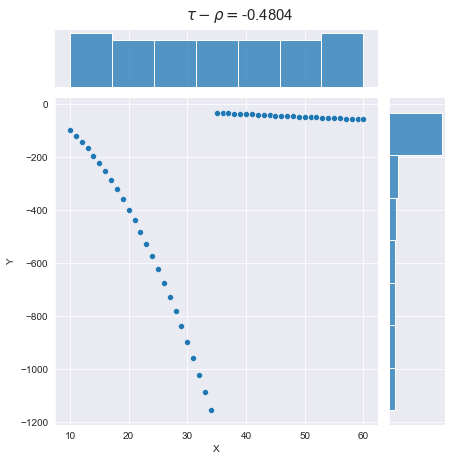

In [17]:
g = sns.jointplot(x=X, y=Y);
g.set_axis_labels('X', 'Y')
plt.suptitle(rf'$\tau-\rho=${diff:.4f}', y=1.03, size=15);

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [18]:
X = np.arange(1, 51, dtype=float)
Y = np.e ** X
diff = pearsonr(X,Y)[0] - spearmanr(X,Y)[0]
print(f'pearson:  {pearsonr(X,Y)[0]:.4f}')
print(f'spearman:  {spearmanr(X,Y)[0]:.4f}')
print(f'diff:  {diff:.4f}')

pearson:  0.3525
spearman:  1.0000
diff:  -0.6475


Looking at the scatterplots below, it is obvious why we get a low pearson correlation, as it's hard to see linearity in the data. On the second hand, we have a strictly positive relation between the vectors. This can be seen in the right graph, using a logaritmic scale.

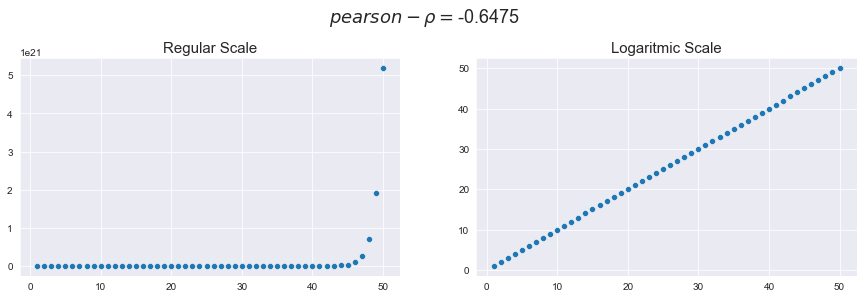

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.scatterplot(x=X, y=Y, ax=ax[0])
sns.scatterplot(x=X, y=np.log(Y), ax=ax[1])
ax[0].set_title('Regular Scale', size=15)
ax[1].set_title('Logaritmic Scale', size=15)
plt.suptitle(rf'$pearson-\rho=${diff:.4f}', size=18, y=1.06);

 #### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

In [20]:
X = np.arange(1, 50, dtype=float)
Y = -X ** 2
X = np.append(X, 100000)
Y = np.append(Y, 100000)
diff = pearsonr(X,Y)[0] - spearmanr(X,Y)[0]
print(f'pearson:  {pearsonr(X,Y)[0]:.4f}')
print(f'spearman:  {spearmanr(X,Y)[0]:.4f}')
print(f'diff:  {diff:.4f}')

pearson:  0.9986
spearman:  -0.8824
diff:  1.8810


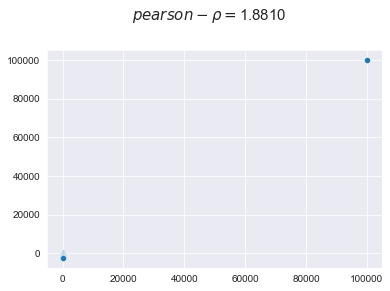

In [21]:
sns.scatterplot(x=X, y=Y);
plt.suptitle(rf'$pearson-\rho=${diff:.4f}', y=1.03, size=15);

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

Initially, we can manipulate the expression above as : $p-\tau>1.2$

With some nontrivial manipulations over each correlation's formula, we can say that Spearman's p over Kendall's Tau have,for a sample of size $n$, a maximum difference of:

$$p-\tau = \frac{2(n-2)\lceil\frac{n}{2}\rceil\lfloor\frac{n}{2}\rfloor}{n(n^{2}-1)}$$
Let us plot this $\forall 1\le n\le 100000$

In [22]:
n = np.arange(10, 100000, 10, dtype=float)
func = ((2*n-4)*np.ceil(n/2)*(n//2)) / (n**3-n)

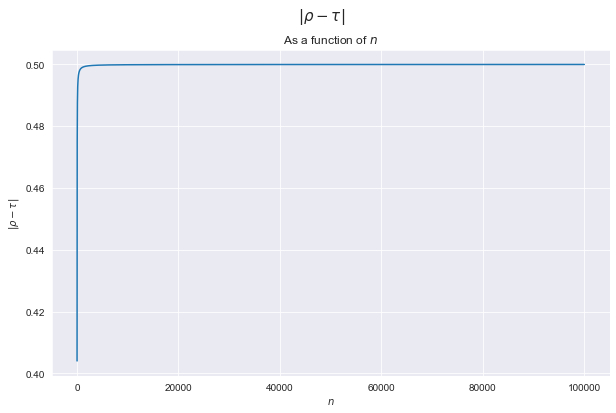

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=n, y=func)
plt.suptitle(r'$|\rho-\tau|$', size=15)
plt.title('As a function of $n$')
plt.xlabel('$n$'), plt.ylabel(r'$|\rho-\tau|$');

This means that, for $n -> \infty$, we get a limiting value of $1/2$ from below. Therefore the difference of 1.2 units is unatainable.

Moreover, we can exemplify this idea with a dataset of size $n = 8$ (since computating all the possible permutations of a dataset of size n = 50 is kinda unfeasable). We plot Kendall over Spearman and we can clearly see the major gap between the red diagonal $p=\tau$ and the Green diagonal line that is for a difference of 1.2 units

In [24]:
DATASET_SIZE = 8

ranks = list(range(DATASET_SIZE))
perms = list(itertools.permutations(range(DATASET_SIZE)))
spearmans = []
kendalls = []
for perm in perms:
    spearmans.append(spearmanr(ranks,perm)[0])
    kendalls.append(kendalltau(ranks,perm)[0])

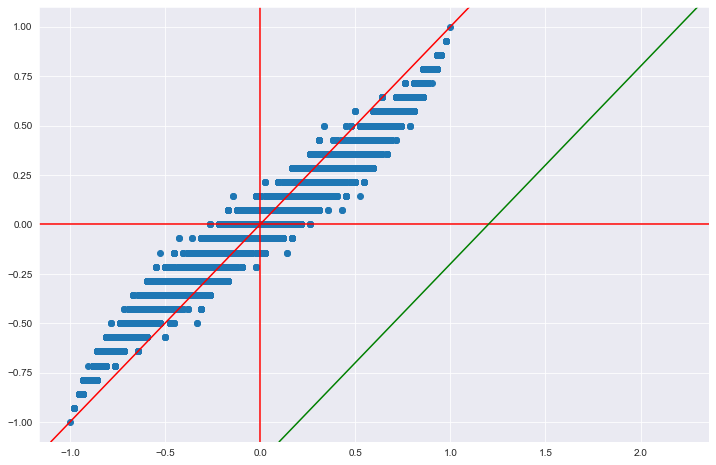

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(spearmans,kendalls)
plt.axhline(y=0,c='r')
plt.axvline(x=0,c='r')
plt.axline((-1,-1),(1,1),c='r')
plt.axline((-1+1.2,-1),(1+1.2,1),c='g');

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


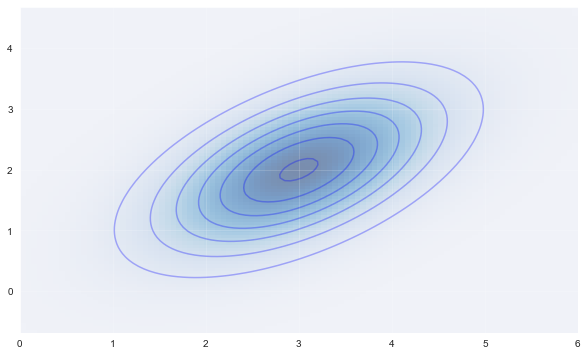

In [26]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots(figsize=(10,6)
    )
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
                alpha=0.3, colors='b')
#     levels=[0.05, 0.1, 0.15, 0.2],
#     ax.axis('equal')
    ax.grid(alpha=0.2)
#     plt.show()

    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)


def fisher(rho):
    return 0.5 * np.log((1+rho)/(1-rho))

def fisher_inv(F):
    return (np.exp(2*F)-1) / (np.exp(2*F)+1)

In [27]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We begin by filling all `NaN` values with the median for numerical features and with the mode for categorial features. We also choose to convert all categorial features to type `int`, as it will be easier for us to spot between categorial and numerical features.

In [30]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].fillna(df.median())
df[['sex', 'cp', 'fbs', 'restecg', 'exang']] = df[['sex', 'cp', 'fbs', 'restecg', 'exang']].fillna(df.mode(axis=0).iloc[0])
df[['sex', 'cp', 'fbs', 'restecg', 'exang']] = df[['sex', 'cp', 'fbs', 'restecg', 'exang']].astype(np.int64)

In [31]:
df.info()  # No NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


Let's get the intuition for the populations differences using the following pairplot with `hue=target`. 

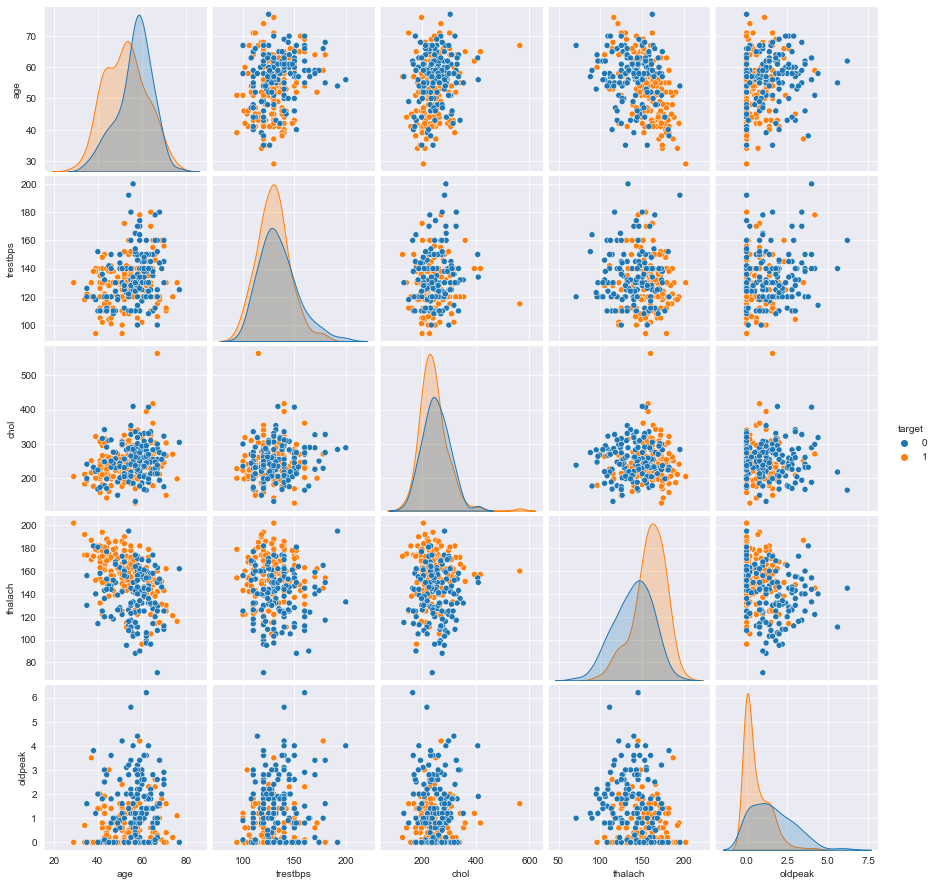

In [32]:
sns.pairplot(pd.concat([df.select_dtypes(float), df['target']], axis=1), hue='target');

We continue by constructing confidence interval for the population (target=0 or 1) means difference $\Delta$  for each feature. We do this by the formula
$$\Delta=(\mu_0-\mu_1)\pm Z_{1-\frac{\alpha}{2}}\cdot \sqrt{\frac{\sigma_0^2}{n_0}+\frac{\sigma_1^2}{n_1}}$$
for $\alpha=0.05$. Our null hypotesis is:
$$H_0:~~~\mu_0=\mu_1$$
If the interval happen to contain $0$, the difference is not significant (with 95% confidence). If the interval is strictly positive, we reject the null hypotesis and say that $\mu_0>\mu_1$ (with 95% confidence) and if the interval is strictly negative, we reject the null hypotesis and say that $\mu_0<\mu_1$ (with 95% confidence).

We create a function for general dataframe, feature, target and $\alpha$.

In [33]:
def diff_interval(df, feature, group_col, alpha):
    Z = norm.ppf(1-alpha/2)
    mean_0, mean_1 = df.groupby(group_col)[feature].mean()
    var_0, var_1 = df.groupby(group_col)[feature].var()
    n_1, n_0 = df[group_col].value_counts()
    return [(mean_0 - mean_1) - Z*(var_0/n_0 + var_1/n_1)**0.5, (mean_0 - mean_1) + Z*(var_0/n_0 + var_1/n_1)**0.5]

In [34]:
alpha = 0.05
for feat in df.select_dtypes(float).columns:
    interval = diff_interval(df, feat, "target", alpha)
    print(f'Mean diff confidence interetval for {feat}:  {interval}')
    if interval[0] > 0:
        print(f'People with heart disease have lower {feat} with {100*(1-alpha):.1f}% confidence.\n\n')
    elif interval[1] < 0:
        print(f'People with heart disease have greater {feat} with {100*(1-alpha):.1f}% confidence.\n\n')
    else:
        print(f'We cannot reject our null hypotesis and say that there\'s a significant difference in {feat} between the populations.\n\n')

Mean diff confidence interetval for age:  [2.2061017425831198, 6.096928560447178]
People with heart disease have lower age with 95.0% confidence.


Mean diff confidence interetval for trestbps:  [1.1355575846807615, 9.031240834291587]
People with heart disease have lower trestbps with 95.0% confidence.


Mean diff confidence interetval for chol:  [-2.892532620825955, 20.24352076311842]
We cannot reject our null hypotesis and say that there's a significant difference in chol between the populations.


Mean diff confidence interetval for thalach:  [-24.11190418153853, -14.591653130714466]
People with heart disease have greater thalach with 95.0% confidence.


Mean diff confidence interetval for oldpeak:  [0.7347501801873132, 1.2305462625004342]
People with heart disease have lower oldpeak with 95.0% confidence.




Here we plot the historgams of the numerical features.

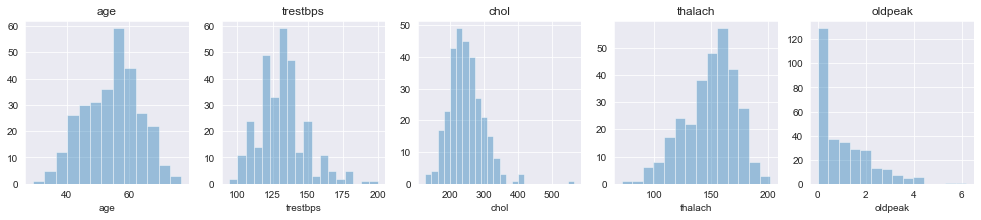

In [35]:
fig, ax = plt.subplots(1,5, figsize=(17,3))
for i, feat in enumerate(df.select_dtypes(float).columns):
    sns.distplot(df[feat], kde=False, ax=ax[i])
    ax[i].set_title(feat)

On first glance, it seems like the `oldpeak` feature is poisson. However, it's non discrete so we assume it's exponetntialy distributed. The MLE for exponential is simply:
$$\hat{\lambda}=\frac{1}{n}\sum_{i=1}^nx_i$$
And indeed:

In [36]:
expon.fit(df.oldpeak)[1] == df.oldpeak.mean()

True

The rest seem to approximate normal. Every normal fit uses MLE in the following way:
$$\hat{\mu}=\frac{1}{n}\sum_{i=1}^nx_i$$
$$\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$$
And indeed, for example:

In [37]:
(df.oldpeak.mean(), np.sqrt(((df.oldpeak - df.oldpeak.mean())**2).sum() / 303)) == norm.fit(df.oldpeak)

True

We now draw all fits on top of histograms:

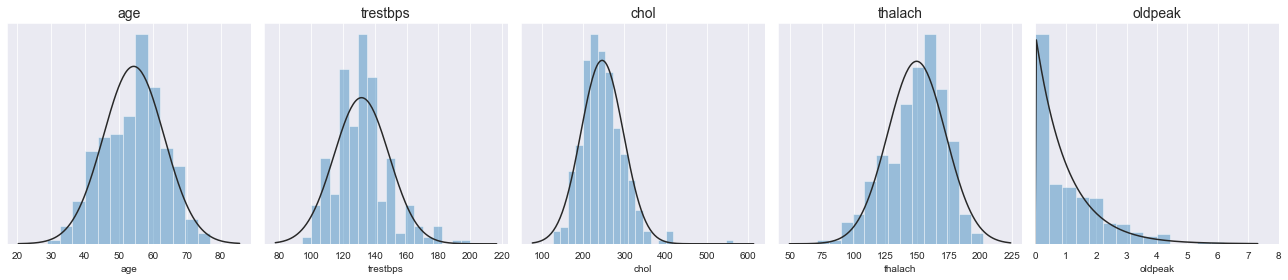

In [38]:
fig, ax = plt.subplots(1,5, figsize=(18,4))
for i, feat in enumerate(df.select_dtypes(float).columns):
    dist = norm
    if feat == 'oldpeak':
        ax[i].set_xlim(0,8)
        dist=expon
    sns.distplot(df[feat], kde=False, fit=dist, ax=ax[i])
    ax[i].set_yticks([])
    ax[i].set_title(feat, size=14)
plt.tight_layout()

We now check for correlations between these features:

In [39]:
corrs = df.select_dtypes(float).corr()
covs = df.select_dtypes(float).cov()
corrs

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.256794,0.208909,-0.401671,0.218477
trestbps,0.256794,1.000000,0.115282,-0.040378,0.194220
chol,0.208909,0.115282,1.000000,-0.017785,0.060661
thalach,-0.401671,-0.040378,-0.017785,1.000000,-0.330060
oldpeak,0.218477,0.194220,0.060661,-0.330060,1.000000


We check if the correlations are significant between the features. We choose 95% confidence level and assume all sample pairs are close to bivirate normal so we can use fisher transform.

In [40]:
def corr_interval(df, feature1, feature2, alpha):
    Z = norm.ppf(1-alpha/2)
    n = len(df[feature1])
    F = fisher(df[[feature1,feature2]].corr().iloc[0,1])
    F_interval = [F - Z/np.sqrt(n-3), F + Z/np.sqrt(n-3)]
    
    return [fisher_inv(i) for i in F_interval]

We will construct confirdence interval for ${5\choose2}=10$ different correlations. We first assume no correlation, namely:
$$H_0:~~~\rho_{i,j}=0$$
If the interval happen to contain $0$, the correlation is not significant (with 95% confidence). If the interval is strictly positive, we reject the null hypotesis and say that $i,j$ are positively correlated (with 95% confidence) and if the interval is strictly negative, we reject the null hypotesis and say that $i,j$ are negatively correlated (with 95% confidence).

Here we construct all possible pairs:

In [41]:
items = df.select_dtypes(float).columns
pairs = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]
pairs

[('age', 'trestbps'),
 ('age', 'chol'),
 ('age', 'thalach'),
 ('age', 'oldpeak'),
 ('trestbps', 'chol'),
 ('trestbps', 'thalach'),
 ('trestbps', 'oldpeak'),
 ('chol', 'thalach'),
 ('chol', 'oldpeak'),
 ('thalach', 'oldpeak')]

In [42]:
alpha = 0.05
for pair in pairs:
    feature1, feature2 = pair
    interval = corr_interval(df, feature1, feature2, alpha)
    print(f'Correlation confidence interetval for {pair}:  {interval}')
    if interval[0] > 0:
        print(f'{feature1} and {feature2} are positively correlated with {100*(1-alpha):.1f}% confidence.\n\n')
    elif interval[1] < 0:
        print(f'{feature1} and {feature2} are negatively correlated with {100*(1-alpha):.1f}% confidence.\n\n')
    else:
        print(f'We cannot reject our null hypotesis and say that there\'s a significant correlation between {feature1} and {feature2}.\n\n')

Correlation confidence interetval for ('age', 'trestbps'):  [0.14841045862162205, 0.3590822046839402]
age and trestbps are positively correlated with 95.0% confidence.


Correlation confidence interetval for ('age', 'chol'):  [0.09855036801245455, 0.31419076720855654]
age and chol are positively correlated with 95.0% confidence.


Correlation confidence interetval for ('age', 'thalach'):  [-0.4920780643050714, -0.3026929434399125]
age and thalach are negatively correlated with 95.0% confidence.


Correlation confidence interetval for ('age', 'oldpeak'):  [0.10846931618259377, 0.32319877800562]
age and oldpeak are positively correlated with 95.0% confidence.


Correlation confidence interetval for ('trestbps', 'chol'):  [0.0026382430936759222, 0.22503688215317763]
trestbps and chol are positively correlated with 95.0% confidence.


Correlation confidence interetval for ('trestbps', 'thalach'):  [-0.15236290348662934, 0.07263041824201949]
We cannot reject our null hypotesis and say that 

We visually plot 2 pairs with significant correlation. These will be `('age', 'thalach')` and `('trestbps', 'oldpeak')`

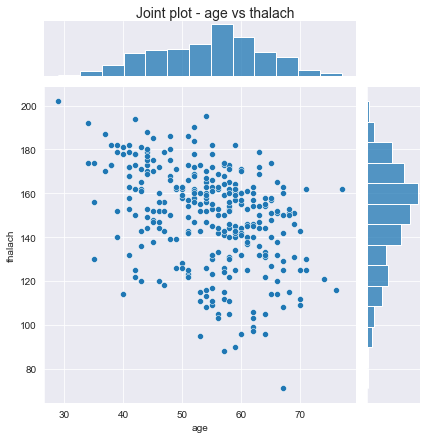

In [43]:
sns.jointplot(x='age', y='thalach', data=df)
plt.suptitle('Joint plot - age vs thalach', y=1.01, size=14);

(81.0, 218.18643424472353)

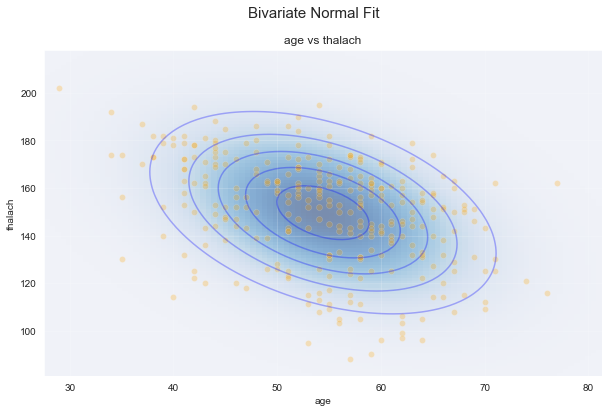

In [44]:
plot_2d_Gaussian_pdf([df.age.mean(), df.thalach.mean()], covs[['age', 'thalach']].loc[['age', 'thalach']].values)
sns.scatterplot(x='age', y='thalach', data=df, alpha=0.25, color='orange')
plt.suptitle('Bivariate Normal Fit', size=15)
plt.title('age vs thalach')
plt.ylim(81)

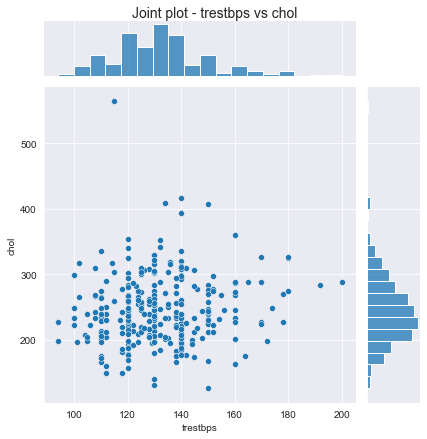

In [45]:
sns.jointplot(x='trestbps', y='chol', data=df)
plt.suptitle('Joint plot - trestbps vs chol', y=1.01, size=14);

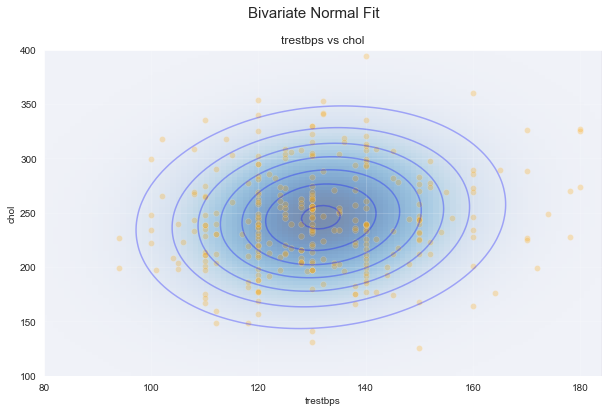

In [46]:
plot_2d_Gaussian_pdf([df.trestbps.mean(), df.chol.mean()], covs[['trestbps', 'chol']].loc[['trestbps', 'chol']].values)
sns.scatterplot(x='trestbps', y='chol', data=df, alpha=0.25, color='orange')
plt.suptitle('Bivariate Normal Fit', size=15)
plt.title('trestbps vs chol')
plt.ylim(100,400)
plt.xlim(80,184);

We check if the `sex` feature affect the significant of some of the correlations. For this we filter the dataframe accordingly and run the same test twice.

In [47]:
df.select_dtypes(float)[df['sex']==1].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.244689,0.168917,-0.414002,0.227949
trestbps,0.244689,1.000000,0.088737,-0.022189,0.108667
chol,0.168917,0.088737,1.000000,-0.050555,0.061772
thalach,-0.414002,-0.022189,-0.050555,1.000000,-0.357558
oldpeak,0.227949,0.108667,0.061772,-0.357558,1.000000


In [48]:
df.select_dtypes(float)[df['sex']==0].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.268502,0.240547,-0.399214,0.230982
trestbps,0.268502,1.000000,0.129123,-0.093803,0.389482
chol,0.240547,0.129123,1.000000,0.010119,0.114090
thalach,-0.399214,-0.093803,0.010119,1.000000,-0.247712
oldpeak,0.230982,0.389482,0.114090,-0.247712,1.000000


In [49]:
alpha = 0.05
for pair in pairs:
    feature1, feature2 = pair
    interval_female = corr_interval(df[df['sex']==0], feature1, feature2, alpha)
    interval_male = corr_interval(df[df['sex']==1], feature1, feature2, alpha)
    if interval_male[0] > 0:
        if interval_female[0] < 0:
            print(f'{feature1} and {feature2} are positively correlated for males but not significantly correlated for females\n\n')
    elif interval_male[0] < 0:
        if interval_female[0] > 0:
            print(f'{feature1} and {feature2} are negatively correlated for males but not significantly correlated for females\n\n')

trestbps and oldpeak are negatively correlated for males but not significantly correlated for females




We now do the same for `target`

In [50]:
alpha = 0.05
for pair in pairs:
    feature1, feature2 = pair
    interval_negative = corr_interval(df[df['target']==0], feature1, feature2, alpha)
    interval_positive = corr_interval(df[df['target']==1], feature1, feature2, alpha)
    if interval_positive[0] > 0:
        if interval_negative[0] < 0:
            print(f'{feature1} and {feature2} are positively correlated for people with heart desease but not significantly correlated for people without heart desease\n')
    elif interval_positive[0] < 0:
        if interval_negative[0] > 0:
            print(f'{feature1} and {feature2} are negatively correlated for people with heart desease but not significantly correlated for people without heart desease\n')
            
    if interval_positive[1] > 0:
        if interval_negative[1] < 0:
            print(f'{feature1} and {feature2} are positively correlated for people with heart desease but not significantly correlated for people without heart desease\n')
    elif interval_positive[1] < 0:
        if interval_negative[1] > 0:
            print(f'{feature1} and {feature2} are negatively correlated for people with heart desease but not significantly correlated for people without heart desease\n')

age and chol are positively correlated for people with heart desease but not significantly correlated for people without heart desease

age and thalach are negatively correlated for people with heart desease but not significantly correlated for people without heart desease

age and oldpeak are positively correlated for people with heart desease but not significantly correlated for people without heart desease

trestbps and oldpeak are positively correlated for people with heart desease but not significantly correlated for people without heart desease



Let us visual these differences by using the absolute value of the correlation difference between the different populations and modify it according to our results. 

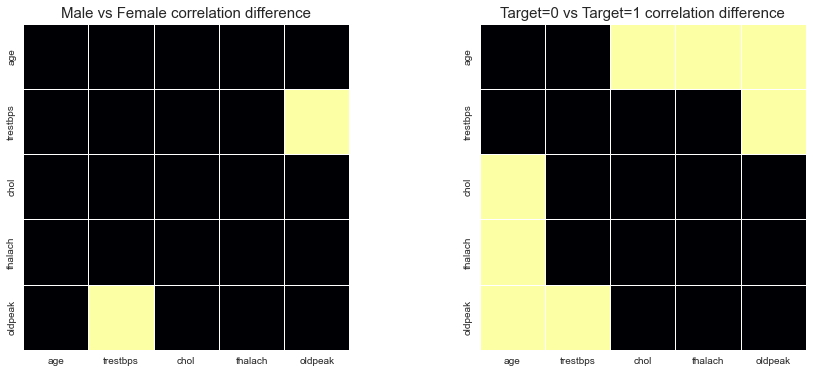

In [51]:
male_female = abs(df.select_dtypes(float)[df['sex']==0].corr() - df.select_dtypes(float)[df['sex']==1].corr())
target0_target1 = abs(df.select_dtypes(float)[df['target']==0].corr() - df.select_dtypes(float)[df['target']==1].corr())
male_female[male_female < .2] = 0
male_female[male_female >= .2] = 1
target0_target1[target0_target1 < .07] = 0
target0_target1[target0_target1 >= .07] = 1
target0_target1.loc['trestbps', 'oldpeak'] = 1
target0_target1.loc['oldpeak', 'trestbps'] = 1

# target0_target[target0_target1]

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.heatmap(male_female, cmap='inferno', ax=ax[0], cbar=False, lw=.5, square=True)
sns.heatmap(target0_target1, cmap='inferno', cbar=False, lw=.5, square=True)
ax[0].set_title('Male vs Female correlation difference', size=15)
ax[1].set_title('Target=0 vs Target=1 correlation difference', size=15);

We now define the `age_bins` column as disjoint intervals that contain `age` for each row. We define the number of bins to be 4 but left it as a parameter for the reader to change.

In [52]:
bins = 4
df['age_bins'] = pd.cut(df['age'], bins)
df.age_bins.head()

0      (53.0, 65.0]
1    (28.952, 41.0]
2    (28.952, 41.0]
3      (53.0, 65.0]
4      (53.0, 65.0]
Name: age_bins, dtype: category
Categories (4, interval[float64, right]): [(28.952, 41.0] < (41.0, 53.0] < (53.0, 65.0] < (65.0, 77.0]]

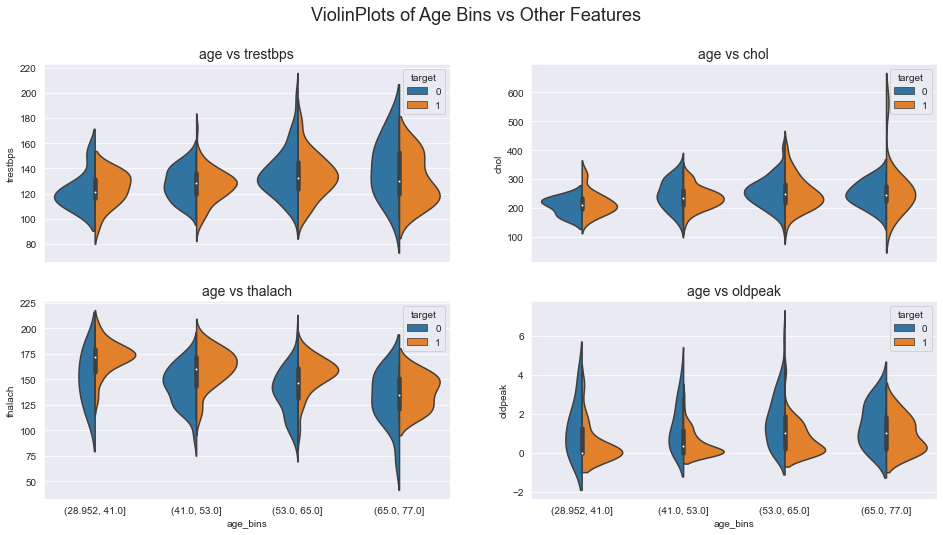

In [53]:
fig, ax = plt.subplots(2,2, figsize=(16,8), sharex=True)
ax = ax.ravel()
for i, feature in enumerate(df.select_dtypes(float).columns[1:]):
    sns.violinplot(x='age_bins', y=feature, data=df, hue='target', split=True, ax=ax[i])
    ax[i].set_title(f'age vs {feature}', size=14)
    if i in (0,1):
        ax[i].set_xlabel('')
plt.suptitle('ViolinPlots of Age Bins vs Other Features', size=18);

**Original question**:

We will check if women have more chance to get a heart desease.
Our null hypotesis - men have the same chance to get a heart desease as female. namely:
$$H_0:~~~ P\{target=1\mid sex=1\}=P\{target=1\mid sex=0\}$$
From the analysis below, we can say that:<br>
$\frac{93}{208}=44.7\%$  of the tested men have heart desease and $\frac{72}{95}=75.8\%$ of the tested women have heart desease.

In [54]:
72/95

0.7578947368421053

In [55]:
df.sex.value_counts()

1    208
0     95
Name: sex, dtype: int64

In [56]:
df[df.sex==1].target.value_counts()

0    115
1     93
Name: target, dtype: int64

In [57]:
df[df.sex==0].target.value_counts()

1    72
0    23
Name: target, dtype: int64

We now check for the significant of our result using a hyper geometric model, assuming men and female have the same chance of getting a heart desease. That is,
$$X\sim HG(N,B,n)$$
Where $N,B,n$ are defined below.

In [58]:
N = 208 + 95
B = 95
n = 72 + 93
X = sp.hypergeom(N, B, n)

As we got 72 women with a heart desease, we check for the probability of getting 72 or more extreme. More formally, we're looking for the pvalue at 72:
$$pvalue=P\{X\ge 72\}=1-P\{X \le 71\}=1-F(71)$$

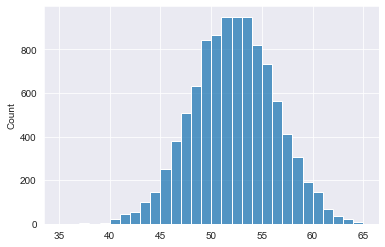

In [59]:
sns.histplot(X.rvs(10000, 42), bins=30);

In [60]:
print(f'pvalue = {1 - X.cdf(71):.10f}')

pvalue = 0.0000002747


Thus, we reject our null hypotesis and can't say that women have equal chance to get a heart desease as men.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

**Answer**: Yes. Proof:

Let $t>0$. Then:
$$\lim_{x\to\infty}e^{tx}P\left(X>x\right)=\lim_{x\to\infty}e^{tx}\left(1-P\left(X\le x\right)\right)=\lim_{x\to\infty}e^{tx}\left(1-P\left(e^{Z}\le x\right)\right)=$$

$$\lim_{x\to\infty}e^{tx}\left(1-P\left(Z\le\ln x\right)\right)=\lim_{x\to\infty}e^{tx}\left(1-\Phi\left(\ln x\right)\right)=\lim_{x\to\infty}e^{tx}\Phi\left(-\ln x\right)=$$

$$\frac{\Phi\left(-\ln x\right)}{e^{-tx}}\underset{L}{=}\lim_{x\to\infty}\frac{\phi\left(-\ln x\right)}{-te^{-tx}}\cdot\left(-\frac{1}{x}\right)=\lim_{x\to\infty}\frac{e^{-\frac{\ln^{2}x}{2}}}{\sqrt{2\pi}txe^{-tx}}=\lim_{x\to\infty}\frac{1}{\sqrt{2\pi}t}\frac{e^{tx-\frac{\ln^{2}x}{2}}}{x}\underset{L}{=}$$

$$\lim_{x\to\infty}\frac{1}{\sqrt{2\pi}t}\frac{e^{tx-\frac{\ln^{2}x}{2}}\cdot\left(t-\frac{\ln x}{x}\right)}{1}=\lim_{x\to\infty}-\frac{\left(t-\frac{\ln x}{x}\right)}{\sqrt{2\pi}t}e^{x\left(t-\frac{\ln^{2}x}{2x}\right)}\underset{\frac{\ln x}{x}\rightarrow0}{=}\frac{t-0}{\sqrt{2\pi}t}e^{\infty\left(t-0\right)}\underset{t>0}{=}\infty$$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

We can rephrase $P(X_{1}<X_{2})$ as:

$$P(X_{1}=x|X_{2}>x)=\intop_{0}^{\infty}\intop_{0}^{x}f(X_{1}=x|X_{2}>x)dxdx\overset{X_{1},X_{2}independent}{\Longleftrightarrow}\intop_{0}^{\infty}\intop_{0}^{x}f(X_{1}=x)f(X_{2}>x)dxdx\Longleftrightarrow\intop_{0}^{\infty}\intop_{0}^{x}f(X_{1}=x)(1-f(X_{2}\leq x))dx$$

 Given that: $F_{X_{2}}(x)=\intop_{0}^{x}f_{X_{2}}(t)dt=\intop_{0}^{x}\lambda_{2}e^{-\lambda_{2}t}dt=1-e^{-\lambda_{2}x}$, we can simplify the integrand and substitute it for the expression above:

$$f_{X_{1}}(x)(1-f(X_{2}\leq x))=\lambda_{1}e^{-\lambda_{1}x}(1-(1-e^{-\lambda_{2}x}))=\lambda_{1}e^{-\lambda_{1}x}e^{-\lambda_{2}x}=\lambda_{1}e^{-(\lambda_{1}+\lambda_{2})x}$$

$$\Rightarrow\intop_{0}^{\infty}\intop_{0}^{x}f(X_{1}=x)(1-f(X_{2}\leq x))dxdx=\intop_{0}^{x}\lambda_{1}e^{-(\lambda_{1}+\lambda_{2})x}dx=\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}$$

So, we've shown that: $P(X_{1}<X_{2})=\frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}$. Let us check that empirically:

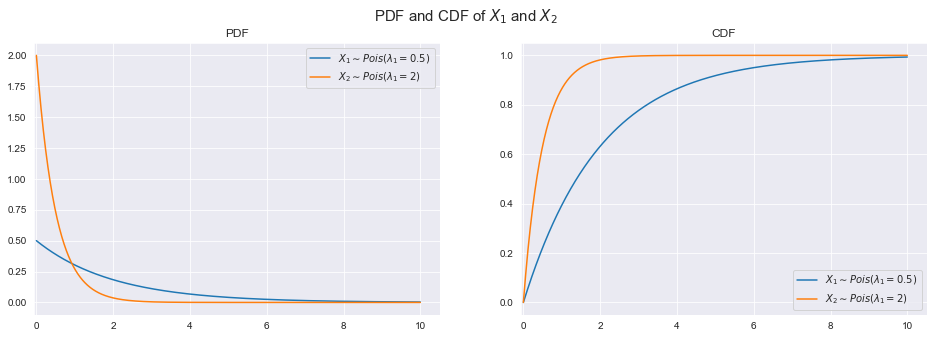

In [61]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
lambda1 = 0.5
lambda2 = 2
prob = lambda1/(lambda1 + lambda2)
X = expon(loc=0, scale=1/lambda1)
Y = expon(loc=0, scale=1/lambda2)
x1 = np.linspace(0, 10, 1000)
x2 = np.linspace(0, 10, 1000)

sns.lineplot(x=x1, y=X.pdf(x1), label=f'$X_1\sim Pois(\lambda_1={lambda1})$', ax=ax[0])
sns.lineplot(x=x2, y=Y.pdf(x2), label=f'$X_2\sim Pois(\lambda_1={lambda2})$', ax=ax[0])
sns.lineplot(x=x1, y=X.cdf(x1), label=f'$X_1\sim Pois(\lambda_1={lambda1})$', ax=ax[1])
sns.lineplot(x=x2, y=Y.cdf(x2), label=f'$X_2\sim Pois(\lambda_1={lambda2})$', ax=ax[1])

ax[0].set_title('PDF'), ax[1].set_title('CDF')
ax[0].set_xlim(-0.07), ax[1].set_xlim(-0.07)
plt.suptitle('PDF and CDF of $X_1$ and $X_2$', size=15);

In [62]:
lambda1/(lambda1 + lambda2)

0.2

Empirically over $100000$ samples:

In [63]:
n = 100000
(X.rvs(n) <= Y.rvs(n)).sum() / n

0.19876

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is Unif(1..6)<br>
After i rolls are determined, the i+1st, $X_{i+1}$, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [3]:
x_0 = np.arange(1,7).reshape(1,6)
T = np.eye(6) * 0.4
for i,j in zip(range(1,6), [0.2,0.1,0,0.1,0.2]):
    T += np.eye(6, k=i) * j + np.eye(6, k=-i) * j
T

array([[0.4, 0.2, 0.1, 0. , 0.1, 0.2],
       [0.2, 0.4, 0.2, 0.1, 0. , 0.1],
       [0.1, 0.2, 0.4, 0.2, 0.1, 0. ],
       [0. , 0.1, 0.2, 0.4, 0.2, 0.1],
       [0.1, 0. , 0.1, 0.2, 0.4, 0.2],
       [0.2, 0.1, 0. , 0.1, 0.2, 0.4]])

As $X_0\sim U[1,6]$, the vector of probabilities of $X_0$ is $\vec{u}=[\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6}]$. As $T$ is a transition matrix, it has an eigen value of 1 which corresponds to the vector $\vec{1}$. thus:
$$T\vec{u}=\frac{1}{6}T\vec{1}=\frac{1}{6}\vec{1}=\vec{u}$$
That means that $X_0$ is the stationary distribution. We can also see this by taking $T^r$ for some large $r$: 

In [4]:
np.round(np.linalg.matrix_power(T, 30),6)

array([[0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667],
       [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667],
       [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667],
       [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667],
       [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667],
       [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667]])

In [5]:
x_0 = np.ones((6, 1)) / 6
T @ x_0

array([[0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667]])

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

**Answer** - Using our intuition from the discussion above and from the result below, we would expect a mean of 30 numbers to be around 3.5 but with a high std, as the samples are relatively small (30)

In [6]:
np.linalg.matrix_power(T,30) @ np.arange(1,7).reshape(6,1)

array([[3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5]])

In [7]:
def calculate_trajects(n_len, t_n=1000):
    tranjes = []
    for _ in range(t_n):
        tranj = []
        tranj.append(np.random.choice(np.arange(1,7)))  # first roll
        roll = np.random.randint(1,7)
        for _ in range(n_len-1):
            x = T[roll-1]
            roll = np.random.choice(np.arange(1,7), p=x)
            tranj.append(roll)
        tranjes.append(np.array(tranj))
    return np.array(tranjes)

In [8]:
tranjects_30 = calculate_trajects(30)

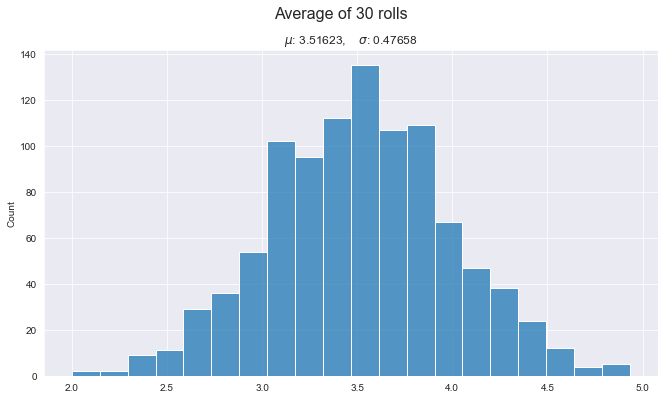

In [9]:
fig, ax = plt.subplots(1,1, figsize=(11,6))
sns.histplot(x=tranjects_30.mean(axis=1), bins=20)
plt.suptitle('Average of 30 rolls', size=16)
plt.title(f'$\mu$: {tranjects_30.mean():.5f},    $\sigma$: {tranjects_30.mean(axis=1).std():.5f}');

Note that this is starting to look normal. Not a big surprise though, as the CLT clearly states the averages of almost any distribution tends to normal.

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

**Answer** - Again, we expect the mean to be around 3.5, but now with a smaller std because of the larger sample size.

In [10]:
tranjects_500 = calculate_trajects(500)

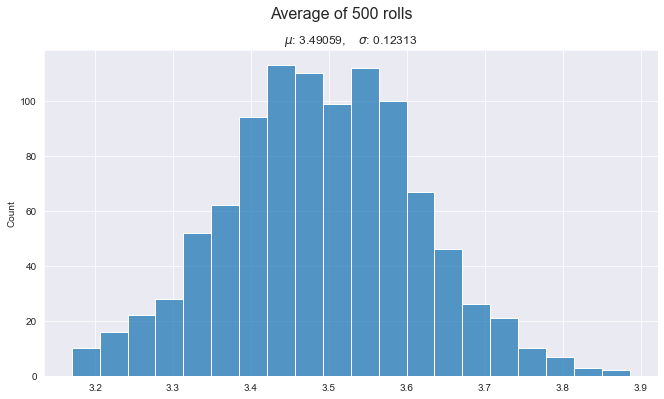

In [11]:
fig, ax = plt.subplots(1,1, figsize=(11,6))
sns.histplot(x=tranjects_500.mean(axis=1), bins=20)
plt.suptitle('Average of 500 rolls', size=16)
plt.title(f'$\mu$: {tranjects_500.mean(axis=1).mean():.5f},    $\sigma$: {tranjects_500.mean(axis=1).std():.5f}');

This looks normal as well but with a smaller sigma, as we suggested. Note that this distribution only accepts values in (1,6) while the normal distribution accepts all values in $\mathbb{R}$.

#### 4.C
Draw normal fit curves on your two histograms.

**Answer** - You can set `kde=True` to see the similarity between them.

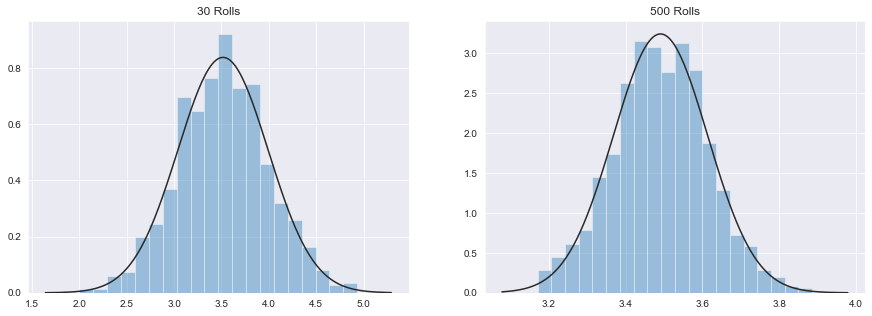

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(x=tranjects_30.mean(axis=1), bins=20, ax=ax[0], kde=False, fit=norm)
sns.distplot(x=tranjects_500.mean(axis=1), bins=20, ax=ax[1], kde=False, fit=norm)
ax[0].set_title('30 Rolls')
ax[1].set_title('500 Rolls');

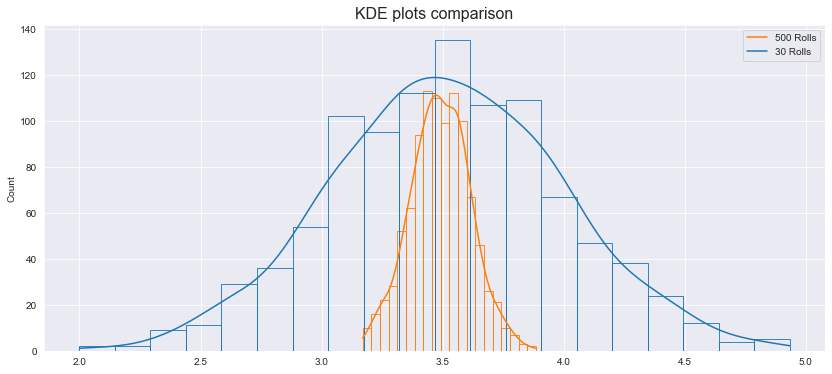

In [13]:
plt.figure(figsize=(14,6))
sns.histplot([tranjects_30.mean(axis=1),tranjects_500.mean(axis=1)], common_bins=False, bins=20, kde=True, fill=False)
plt.legend(labels=['500 Rolls', '30 Rolls'])
plt.title('KDE plots comparison', size=16);

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

**Answer -**  We calculate the theoretical covariance. We expect the covariance to be very large between $X_0,X_1$ as the probabilities for $X_1$ are greatly dependent on $X_0$. As we already saw, going further on the expirements, we expect a convergence of the transition matrix to a uniform state. This will result a graduate decrease of the covariance between $X_0$ and $X_i$ as we increase $i$ because if $X_i$ is approximately uniform, it's not correllated with $X_0$.

In [14]:
def cov_markov(p0, Omega, T, n):
    corrs = []
    RV = Omega
    for i in range(n):
        RV = T @ RV
        corrs.append(np.cov(Omega.T, RV.T, bias=True)[0,1])
    return corrs

In [15]:
X0 = np.arange(1,7).reshape(6,1)  # dice 1 to 6
p0 = np.ones(6) / 6  # uniform p=1/6
markov_covs = np.array(cov_markov(p0, X0, T, 500))
np.array(markov_covs[:56])

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939460e-06,  3.81469728e-06,  1.90734864e-06,
        9.53674317e-07,  4.76837159e-07,  2.38418579e-07,  1.19209290e-07,
        5.96046448e-08,  2.98023222e-08,  1.49011610e-08,  7.45058074e-09,
        3.72529030e-09,  1.86264496e-09,  9.31322538e-10,  4.65661250e-10,
        2.32830570e-10,  1.16415359e-10,  5.82076609e-11,  2.91040155e-11,
        1.45518782e-11,  7.27573557e-12,  3.63786778e-12,  1.81898940e-12,
        9.09679739e-13,  4.54895381e-13,  2.27410683e-13,  1.13686838e-13,
        5.66953891e-14,  2.84217094e-14,  1.41368398e-14,  7.17944223e-15,
        3.21964677e-15,  1.59131967e-15,  9.99200722e-16,  6.66133815e-16,
        3.70074342e-16,  

By plotting this behaviour, we can see the fast convergence. The brown dashed line indicates $\sqrt[10]{Cov(X_0,X_i)}$ to show the trend better.

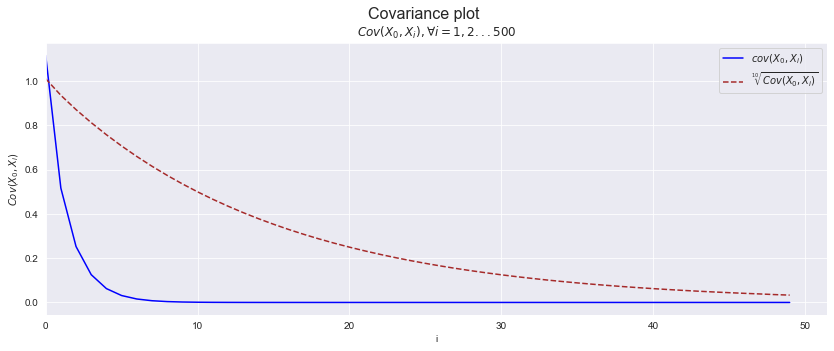

In [16]:
plt.figure(figsize=(14,5))
plt.plot(markov_covs[:50], label = '$cov(X_0,X_i)$', c='b')
plt.plot(markov_covs[:50]**0.1, label='$\sqrt[10]{Cov(X_0,X_i)}$', ls='--', c='brown')
plt.suptitle('Covariance plot', size=16)
plt.title(r'$Cov(X_0,X_i), \forall i=1,2...500$')
plt.xlabel('i'), plt.ylabel('$Cov(X_0,X_i)$'), plt.xlim(0), plt.legend();

### correctness of the algorithm
We start by initiating the sample space of $X_0$.

In [17]:
X_0 = np.arange(1,7).reshape(1,6)
X_0

array([[1, 2, 3, 4, 5, 6]])

We now calculate $X_1$ using $TX_0$. Note that these values are of the form:
$$E(X_1\mid X_0=i)$$
So:
$$E(X_1)=\frac{1}{6}\sum_{i=1}^{6}E\left(X_{1}\mid X_{0}=i\right)$$
In the algorithm we always calculate $X_i$ using $TX_{i-1}$.

In [18]:
X_1 = (T @ X_0.T ).T
X_1

array([[2.8, 2.6, 3. , 4. , 4.4, 4.2]])

As we're about to show in the next item, we have $E(X_0)=E(X_i)$ for every relevant $i$. So we can check for the covariance by definition:

In [19]:
np.mean((X_0-3.5)*(X_1-3.5))

1.1166666666666665

Let us compare that with the algorithm step:

We now do the same for $X_2$ and $X_3$

In [20]:
X_2 = X_1 @ T
X_3 = X_2 @ T
print(np.mean((X_0-3.5)*(X_2-3.5)))
print(np.cov(X_0, X_2, bias=True)[0,1])
print(np.mean((X_0-3.5)*(X_3-3.5)))
print(np.cov(X_0, X_3, bias=True)[0,1])

0.5166666666666667
0.5166666666666667
0.2526666666666668
0.2526666666666668


We explain the result in another way. consider the joint distribution space of $X_0X_i$:

In [21]:
xx = np.arange(1,7).reshape(1,6)
x0_xi = xx.T @ xx
x0_xi

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36]])

Remember that:
$$P(X_0=x,X_1=y)=\underset{T_0}{\underbrace{P(X_1=y|X_0=x)}}\underset{\pi_0}{\underbrace{P(X_0=x)}}$$
Hence multiplyng the sample space with $T_0$ **element wise**, multiply by $\pi_0=\vec{\frac{1}{6}}$ and sum should yield $E(X_0X_1)$.<br>
Doing so and subtracting $E(X_0)E(X_1)=3.5^2$, as in the formula:
$$cov(X_0,X_1)=E(X_0X_1)-E(X_0)E(X_1)$$
yields the same covariance as before.

In [22]:
((x0_xi * T)/6).sum() - 3.5**2

1.1166666666666671

Moreover, our assumption for the vanishing covariance as we increase $i$, namely:
$$\lim_{i\to\infty}Cov\left(X_{0},X_{i}\right)=0$$
is correlated with the output we got from the algorithm.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

**Answer:**
1. In our case, the distribution of $X_0$ is the stationary distribution, (as we showed earlier). Thus $E(X_i)=E(X_0),~~\forall 0\le i\le n$. For example, we show the calculation for $E(X_1),E(X_2)$:

In [23]:
X1 = X_0 @ T
X2 = X1 @ T
print(X1)  # E(X1|X0=i) for all i=1,..,6
print(X2)  # E(X2|X1=i) for all i=1,..,6
print(X1.mean())  # E(X1)
print(X2.mean())  # E(X2)

[[2.8 2.6 3.  4.  4.4 4.2]]
[[3.22 3.02 3.24 3.76 3.98 3.78]]
3.5
3.5


Using that fact, we conclude:
$$E\left(\bar{X_{n}}\right)=E\left[\frac{1}{n}\sum_{i=0}^{n-1}X_{i}\right]=\frac{1}{n}\sum_{i=0}^{n-1}E\left(X_{i}\right)=\frac{1}{n}nE\left(X_{0}\right)=E\left(X_{0}\right)$$
In our case the result is $3.5$.

2. We calculate the variance:
$$Var\left(\bar{X_{n}}\right)=\frac{1}{n^{2}}Var\left(\sum_{i=0}^{n-1}X_{i}\right)=\frac{1}{n^{2}}\left[\sum_{i=0}^{n-1}Var\left(X_{i}\right)+2\sum_{i=0}^{n-1}\sum_{j>i}cov\left(X_{i},X_{j}\right)\right]=$$
$$Var\left(\bar{X_{n}}\right)=\frac{1}{n^{2}}\sum_{i=0}^{n-1}Cov\left(X_{i},X_{i}\right)+\frac{2}{n^{2}}\sum_{i=0}^{n-1}\sum_{j>i}cov\left(X_{i},X_{j}\right)$$

Using the property $Cov(X_i,X_{i+t})=Cov(X_0,X_t)$, we get:

$$Var\left(\bar{X_{n}}\right)=\frac{1}{n^{2}}\sum_{i=0}^{n-1}Cov\left(X_{i},X_{i}\right)+\frac{2}{n^{2}}[(n-1)Cov\left(X_{0},X_{1}\right)+\left(n-2\right)Cov\left(X_{0},X_{2}\right)+\ldots\underset{\left(*\right)}{\underbrace{2Cov\left(X_{0},X_{n-2}\right)}}+Cov\left(X_{0},X_{n-1}\right)]=$$
$$\frac{1}{n^{2}}\sum_{i=0}^{n-1}Cov\left(X_{0},X_{0}\right)+\frac{2}{n^{2}}\sum_{i=1}^{n-1}\left(n-i\right)Cov\left(X_{0},X_{i}\right)=$$
$$\frac{1}{n^{2}}nVar\left(X_{0}\right)+\frac{2}{n^{2}}\sum_{i=1}^{n-1}\left(n-i\right)Cov\left(X_{0},X_{i}\right)$$
$$\frac{1}{n}Var\left(X_{0}\right)+\frac{2}{n^{2}}\sum_{i=1}^{n-1}\left(n-i\right)Cov\left(X_{0},X_{i}\right)$$

$(*)$ We cover the intuition for $2Cov\left(X_{0},X_{n-2}\right)$.

One can check that the only possiblities for that would be $Cov(X_0,X_{n-2})$ and $Cov(X_1,X_{n-1})$, a total of 2. For the same reason, the coefficient of $Cov(X_{0},X_{n-4})$ is $4$ as the only possibilities are $Cov(X_0,X_{n-4}), Cov(X_1,X_{n-3}), Cov(X_2,X_{n-2})$ and $Cov(X_3,X_{n-1})$. This can be checked for the rest of the combinations and can be proven for the general case by induction.

In our case for $n=500$:

In [40]:
X0.var()/500 + 2/500**2 * markov_covs.sum()

0.005850425925925926

We now formulate CLT for Markov chains.

Let $\pi_0,T$ define a markov chain. Based on the previous items, we say that:

$$\lim_{n\to \infty}\frac{\bar{X_n}-E[X_0]}{\sqrt{\frac{1}{n}Var\left(X_{0}\right)+\frac{2}{n^{2}}\sum_{i=1}^{n-1}\left(n-i\right)Cov\left(X_{0},X_{i}\right)}}\sim \mathcal{N}(0,1)$$
Let us see this graphically for $n=500$. Note that $\hat{\mu}\approx 0,\hat{\sigma}\approx 1$ as expected.

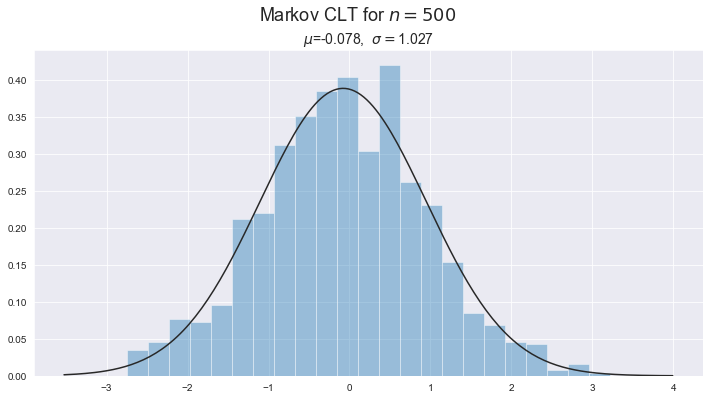

In [46]:
plt.figure(figsize=(12,6))
Z_500 = (tranjects_500.mean(axis=1) - 3.5) / np.sqrt(X0.var()/500 + 2/500 * markov_covs.sum())
sns.distplot(Z_500, fit=norm, kde=False)
plt.suptitle('Markov CLT for $n=500$', size=18)
plt.title(f'$\mu$={norm.fit(Z_500)[0]:.3f},  $\sigma=${norm.fit(Z_500)[1]:.3f}', size=14);

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

**Answer** - Intuitively, as $\vec{x_n}$ is sorted, we understand that $P\{R(\vec{x_n})=i\}$ is small for both low and low $i$ values. e.g the only possibility for $R(\vec{x_n})=1$ is if only one of the $n$ samples is to the left of the median and $n-1$ are to its right. Assuiming $n>100$, the probability of such event is very small. A similar intuition holds for $R(\vec{x_n})=n$ .

That being said, we would expect $R$ to yield an index around the middle, that is:
$$E[R(\vec{x_n})]=\lfloor\frac{n}{2}\rfloor$$

We are now going to prove that $R(\vec{x_n})\sim B(n,p=0.5)$.

Consider the (unsorted) vector of samples $\vec{x_n}$. Every entry has a probability of 0.5 to be located to the right of the median and 0.5 probability to be located to the left of it. We consider being smaller equal than the median as a success.<br>
Say we have $k$ successes, that means we have $k$ entries which are smaller equal than $m$ and $n-k$ entries bigger than $m$. We now sort $\vec{x_n}$. As $k$ entries are less equal than $m$, these would be $x_1,x_{2},...,x_k$. Hence $x_{k}$ is less equal to $m$ and it's the largest of all of them (as the list is now sorted). namely: $$R(\vec{x_n})=k$$

Let $Y\sim B(n,0.5)$. We actually got that:
$$P\{R(\vec{x_n})=k\}=P\{Y=k\}= {n\choose k}p^k(1-p)^{n-k}=\frac{{n\choose k}}{2^n}$$
Moreover:
$$E[R(\vec{x_n})]=np=\frac{n}{2}$$
Like we got from our intuition before.

Let us visually plot some samples and compare with a binom. We choose an arbitrary continuous distribution for the expirements. It doesn't matter which because either way $P(X\le m)=0.5$ should hold. We choose normal stardard for that purpose and show the idea visually.

In [87]:
Y = binom(101, 0.5)
X = norm(0,1)

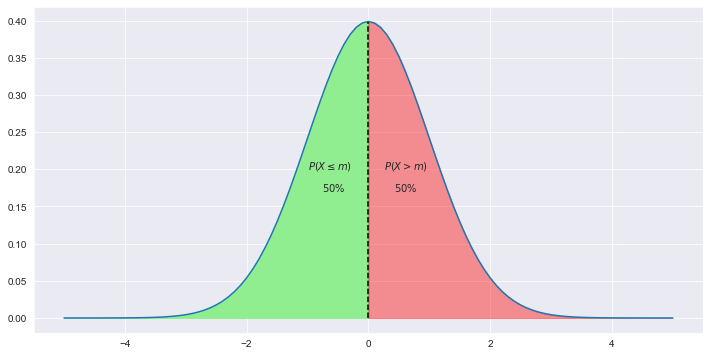

In [88]:
plt.figure(figsize=(12,6))
x = np.linspace(-5,5, 101)
sns.lineplot(x=x, y=norm.pdf(x))
plt.vlines(x=0, ymin=0, ymax=0.398, ls='--', color='black')
plt.fill_between(x[:len(x)//2+1], norm.pdf(x[:len(x)//2+1]), color='lightgreen')
plt.fill_between(x[len(x)//2:], norm.pdf(x[len(x)//2:]), color='red', alpha=0.4)
plt.annotate(r'$P(X\leq m)$', xy=[-1,.2]), plt.annotate(r'$P(X>m)$', xy=[.25,.2])
plt.annotate(r'$50\%$', xy=[-.77,.17]), plt.annotate(r'$50\%$', xy=[.42,.17]);

We draw 101 samples of stardard normal as a vector, sort it and then choose the index of the first entry that is greater than the median, $0$ in our case.<br>
Here we show an example:

In [89]:
X_sample = X.rvs(101)
X_sample = np.sort(X_sample)

In [90]:
X_sample > 0  # We pick the first "False"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

We repeat this proccess 10000 times and expect binomial convergence.

In [91]:
lst = []
n = 10000
for _ in range(n):
    X_sample = X.rvs(101)
    X_sample = np.sort(X_sample)
    for i in range(len(X_sample)):
        if X_sample[i] > 0:
            lst.append(i)  # instead of i-1 because indices start at 0
            break

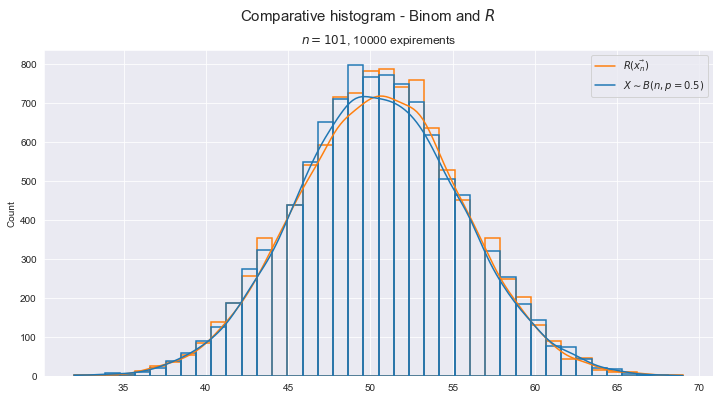

In [92]:
plt.figure(figsize=(12,6))
sns.histplot([lst, Y.rvs(n)], bins=40, kde=True, fill=False, common_bins=True)
plt.suptitle('Comparative histogram - Binom and $R$', size=15)
plt.title(f'$n=101$, {n} expirements')
plt.legend([r'$R(\vec{x_n})$', r'$X \sim B(n,p=0.5)$']);

In order to find the $i$ index that satisfies $P(x_{i} \le m) \ge 1-\alpha)$ and $P(x_{i+1} \le m) < 1-\alpha)$, Consider the inverse of $R$ at $(\alpha)$ as a solution for this problem. This will yield the number which has at least $\alpha$ chance to be the first index of the element to the right of the median, so the index before it has at most $\alpha$ chance to be on the right of the median, or $1-\alpha=0.95$ chance to be less or equal than the median,  as required.

We proved that $R$ is binomial, Hence we define:
$$\lambda(n)=F_Y^{-1}(1-\alpha)-1$$ Where $Y\sim B(n,0.5)$. Remember the reason we substract $1$, as denoted above.

Let us test these results:

In [93]:
num = Y.ppf(1-0.95) - 1
num

41.0

In [94]:
1 - Y.cdf(num)

0.963621496561238

In [95]:
1 - Y.cdf(num+1)

0.9445408251696797

Indeed, we got the required result.